**Loading** CMU-MOSI **dataset**

In [ ]:
!git clone https://github.com/pliang279/MultiBench.git

Cloning into 'MultiBench'...
remote: Enumerating objects: 6943, done.
remote: Counting objects: 100% (154/154), done.
remote: Compressing objects: 100% (94/94), done.
remote: Total 6943 (delta 72), reused 121 (delta 60), pack-reused 6789
Receiving objects: 100% (6943/6943), 51.07 MiB | 13.06 MiB/s, done.
Resolving deltas: 100% (4258/4258), done.


In [ ]:
%cd MultiBench

/content/MultiBench


In [ ]:
!mkdir data
!pip install gdown && gdown https://drive.google.com/u/0/uc?id=1szKIqO0t3Be_W91xvf6aYmsVVUa7wDHU

mkdir: cannot create directory ‘data’: File exists


In [ ]:
import torch
import sys
import os

In [ ]:
# Import the associated dataloader for affect datasets, which MOSI is a part of.
from datasets.affect.get_data import get_dataloader

# Create the training, validation, and test-set dataloaders.
traindata, validdata, testdata = get_dataloader(
    '/content/MultiBench/mosi_raw.pkl', robust_test=False, max_pad=True, data_type='mosi', max_seq_len=50)

In [ ]:
all_labels=[]
for batch in traindata:
  labels=batch[-1]
  labels=torch.where(labels>=0 , torch.tensor(float(1)),torch.tensor(float(0)))
  all_labels.extend(labels)

print(all_labels.count(torch.tensor(1)))
print(all_labels.count(torch.tensor(0)))



731
552


In [ ]:
all_labels=[]
for batch in validdata:
  labels=batch[-1]
  labels=torch.where(labels>=0 , torch.tensor(float(1)),torch.tensor(float(0)))
  all_labels.extend(labels)

print(all_labels.count(torch.tensor(1)))
print(all_labels.count(torch.tensor(0)))



136
78


## **splitting dataset to remove bias**

In [ ]:
from torch.utils.data import TensorDataset,DataLoader,ConcatDataset
import numpy as np

In [ ]:
all_audio=[]
all_video=[]
all_text = []
all_labels = []

c_1=550
c_0=550

for batch in traindata:
    audio,video,text,labels = batch
    labels=torch.where(labels>=0 , torch.tensor(float(1)),torch.tensor(float(0)))
    for i in range(len(labels)):
      if batch[3][i]!=0:
        if labels[i][0]==torch.tensor(float(0)) and c_0>0:
          c_0-=1
          all_labels.append(batch[3][i])
          all_text.append(text[i])
          all_video.append(video[i])
          all_audio.append(audio[i])

        if labels[i][0]==torch.tensor(float(1)) and c_1>0:
          c_1-=1
          all_labels.append(batch[3][i])
          all_text.append(text[i])
          all_video.append(video[i])
          all_audio.append(audio[i])

    if c_1==0 and c_0==0:
      break

all_audio=torch.stack(all_audio)
all_video=torch.stack(all_video)
all_text=torch.stack(all_text)
all_labels=torch.stack(all_labels)

print(all_audio.shape)
print(all_video.shape)
print(all_text.shape)
print(all_labels.shape)

# Create a new DataLoader with all text and labels
new_dataset = TensorDataset(all_audio,all_video,all_text, all_labels)
train_dataloader = DataLoader(new_dataset, batch_size=16,shuffle=True)

torch.Size([1100, 50, 35])
torch.Size([1100, 50, 74])
torch.Size([1100, 50, 300])
torch.Size([1100, 1])


In [ ]:
all_audio=[]
all_video=[]
all_text = []
all_labels = []

c_1=75
c_0=75

for batch in validdata:
    audio,video,text,labels = batch
    labels=torch.where(labels>=0 , torch.tensor(float(1)),torch.tensor(float(0)))
    for i in range(len(labels)):
      if batch[3][i]!=0:
        if labels[i][0]==torch.tensor(float(0)) and c_0>0:
          c_0-=1
          all_labels.append(batch[3][i])
          all_text.append(text[i])
          all_video.append(video[i])
          all_audio.append(audio[i])

        if labels[i][0]==torch.tensor(float(1)) and c_1>0:
          c_1-=1
          all_labels.append(batch[3][i])
          all_text.append(text[i])
          all_video.append(video[i])
          all_audio.append(audio[i])

    if c_1==0 and c_0==0:
      break

all_audio=torch.stack(all_audio)
all_video=torch.stack(all_video)
all_text=torch.stack(all_text)
all_labels=torch.stack(all_labels)

print(all_audio.shape)
print(all_video.shape)
print(all_text.shape)
print(all_labels.shape)

# Create a new DataLoader with all text and labels
new_dataset = TensorDataset(all_audio,all_video,all_text, all_labels)
val_dataloader = DataLoader(new_dataset, batch_size=16,shuffle=True)

torch.Size([150, 50, 35])
torch.Size([150, 50, 74])
torch.Size([150, 50, 300])
torch.Size([150, 1])


In [ ]:
all_audio=[]
all_video=[]
all_text = []
all_labels = []

c_1=250
c_0=250

for batch in testdata:
    audio,video,text,labels = batch
    labels=torch.where(labels>=0 , torch.tensor(float(1)),torch.tensor(float(0)))
    for i in range(len(labels)):
      if batch[3][i]!=0:
        if labels[i][0]==torch.tensor(float(0)) and c_0>0:
          c_0-=1
          all_labels.append(batch[3][i])
          all_text.append(text[i])
          all_video.append(video[i])
          all_audio.append(audio[i])

        if labels[i][0]==torch.tensor(float(1)) and c_1>0:
          c_1-=1
          all_labels.append(batch[3][i])
          all_text.append(text[i])
          all_video.append(video[i])
          all_audio.append(audio[i])

    if c_1==0 and c_0==0:
      break

all_audio=torch.stack(all_audio)
all_video=torch.stack(all_video)
all_text=torch.stack(all_text)
all_labels=torch.stack(all_labels)

print(all_audio.shape)
print(all_video.shape)
print(all_text.shape)
print(all_labels.shape)

# Create a new DataLoader with all text and labels
new_dataset = TensorDataset(all_audio,all_video,all_text, all_labels)
test_dataloader = DataLoader(new_dataset, batch_size=16,shuffle=True)

torch.Size([500, 50, 35])
torch.Size([500, 50, 74])
torch.Size([500, 50, 300])
torch.Size([500, 1])


torch.Size([1283, 50, 300])

torch.Size([1283, 1])

In [ ]:
val=0
for batch in traindata:
  audio,video,text,label=batch
  val+=audio.shape[0]
print(val)


val=0
for batch in validdata:
  audio,video,text,label=batch
  val+=audio.shape[0]

print(val)

val=0
for batch in testdata:
  audio,video,text,label=batch
  val+=audio.shape[0]

print(val)

1283
214
686


# **Reducing dimension for visualization**

In [ ]:
# from torch.utils.data import TensorDataset,DataLoader,ConcatDataset

In [ ]:
# all_audio = []
# all_labels = []

# for batch in traindata:
#     audio,video,text,labels=batch  #text and labels are the last two components
#     all_audio.append(audio)
#     labels = torch.where(labels > 0, torch.tensor(float(1)), torch.tensor(float(0)))
#     all_labels.append(labels)
#     break

# # Concatenate all batches
# all_audio = torch.cat(all_audio, dim=0)
# all_labels = torch.cat(all_labels, dim=0)

# # # Create a new DataLoader with all text and labels
# # new_dataset = TensorDataset(all_text, all_labels)
# # train_text_dataloader = DataLoader(new_dataset, batch_size=32,shuffle=True)

In [ ]:
# print(all_audio.shape)
# print(all_labels.shape)

torch.Size([1283, 50, 35])
torch.Size([1283, 1])


In [ ]:
# all_audio=torch.mean(all_audio,dim=1)
# print(all_audio.shape)

torch.Size([1283, 35])


In [ ]:
# from sklearn.manifold import TSNE
# import matplotlib.pyplot as plt
# from sklearn.preprocessing import StandardScaler
# import numpy as np

# #Apply t-SNE

# # # Normalize text embeddings
# # scaler = StandardScaler()
# # normalized_text_embeddings = scaler.fit_transform(all_text)

# # Apply t-SNE

# # all_audio_reshaped = np.reshape(all_audio, (all_audio.shape[0] ,all_audio.shape[1]*all_audio.shape[2]))
# tsne = TSNE(n_components=2, random_state=42)
# audio_embeddings_tsne = tsne.fit_transform(all_audio)

# # Visualize t-SNE
# plt.figure(figsize=(10, 8))
# plt.scatter(audio_embeddings_tsne[:, 0], audio_embeddings_tsne[:, 1], c=all_labels, cmap='viridis')
# plt.title('t-SNE Visualization of audio Embeddings with Modified Labels')
# plt.xlabel('t-SNE Dimension 1')
# plt.ylabel('t-SNE Dimension 2')
# plt.colorbar()
# plt.show()


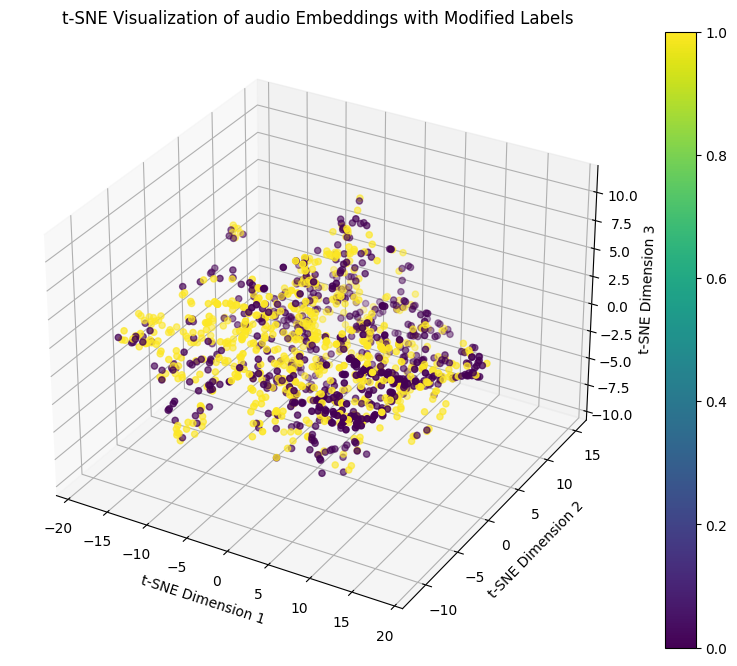

In [ ]:
# from sklearn.manifold import TSNE
# import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D  # Importing this for 3D plotting
# from sklearn.preprocessing import StandardScaler
# import numpy as np

# # Apply t-SNE
# tsne = TSNE(n_components=3, random_state=42)
# audio_embeddings_tsne = tsne.fit_transform(all_audio)

# # Visualize t-SNE in 3D
# fig = plt.figure(figsize=(10, 8))
# ax = fig.add_subplot(111, projection='3d')
# scatter = ax.scatter(audio_embeddings_tsne[:, 0], audio_embeddings_tsne[:, 1], audio_embeddings_tsne[:, 2], c=all_labels, cmap='viridis')
# plt.title('t-SNE Visualization of audio Embeddings with Modified Labels')
# ax.set_xlabel('t-SNE Dimension 1')
# ax.set_ylabel('t-SNE Dimension 2')
# ax.set_zlabel('t-SNE Dimension 3')
# plt.colorbar(scatter)
# plt.show()


In [ ]:
# all_video = []
# all_labels = []

# for batch in traindata:
#     audio,video,text,labels=batch  #text and labels are the last two components
#     all_video.append(video)
#     labels = torch.where(labels > 0, torch.tensor(1), torch.tensor(0))
#     all_labels.append(labels)

# # Concatenate all batches
# all_video = torch.cat(all_video, dim=0)
# all_labels = torch.cat(all_labels, dim=0)

# # # Create a new DataLoader with all text and labels
# # new_dataset = TensorDataset(all_text, all_labels)
# # train_text_dataloader = DataLoader(new_dataset, batch_size=32,shuffle=True)

In [ ]:
# print(all_video.shape)
# print(all_labels.shape)

torch.Size([1283, 50, 74])
torch.Size([1283, 1])


In [ ]:
# all_video=torch.mean(all_video,dim=1)
# print(all_video.shape)

torch.Size([1283, 74])


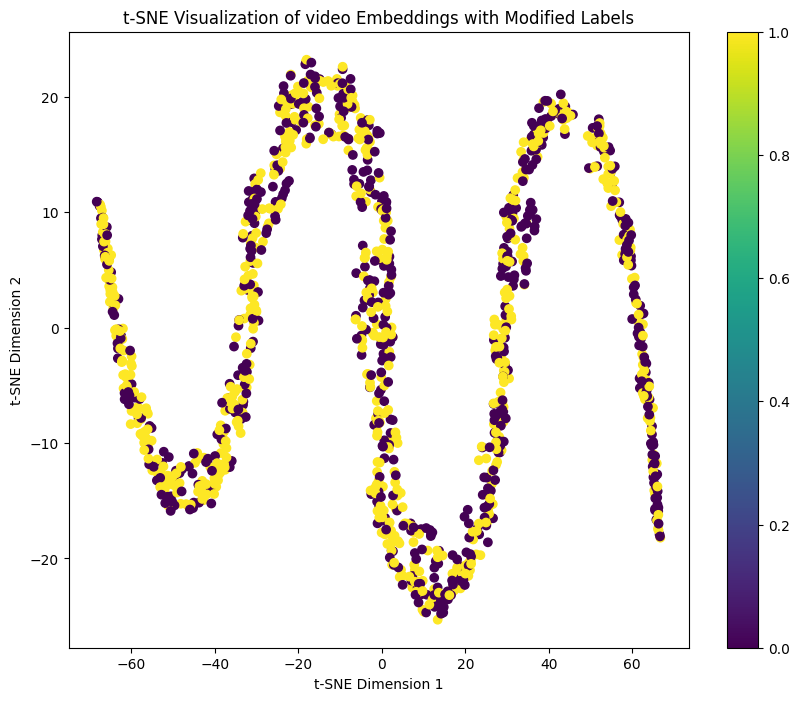

In [ ]:
# from sklearn.manifold import TSNE
# import matplotlib.pyplot as plt
# from sklearn.preprocessing import StandardScaler
# import numpy as np

# #Apply t-SNE

# # # Normalize text embeddings
# # scaler = StandardScaler()
# # normalized_text_embeddings = scaler.fit_transform(all_text)

# # Apply t-SNE

# # all_audio_reshaped = np.reshape(all_audio, (all_audio.shape[0] ,all_audio.shape[1]*all_audio.shape[2]))
# tsne = TSNE(n_components=2, random_state=42)
# video_embeddings_tsne = tsne.fit_transform(all_video)

# # Visualize t-SNE
# plt.figure(figsize=(10, 8))
# plt.scatter(video_embeddings_tsne[:, 0], video_embeddings_tsne[:, 1], c=all_labels, cmap='viridis')
# plt.title('t-SNE Visualization of video Embeddings with Modified Labels')
# plt.xlabel('t-SNE Dimension 1')
# plt.ylabel('t-SNE Dimension 2')
# plt.colorbar()
# plt.show()


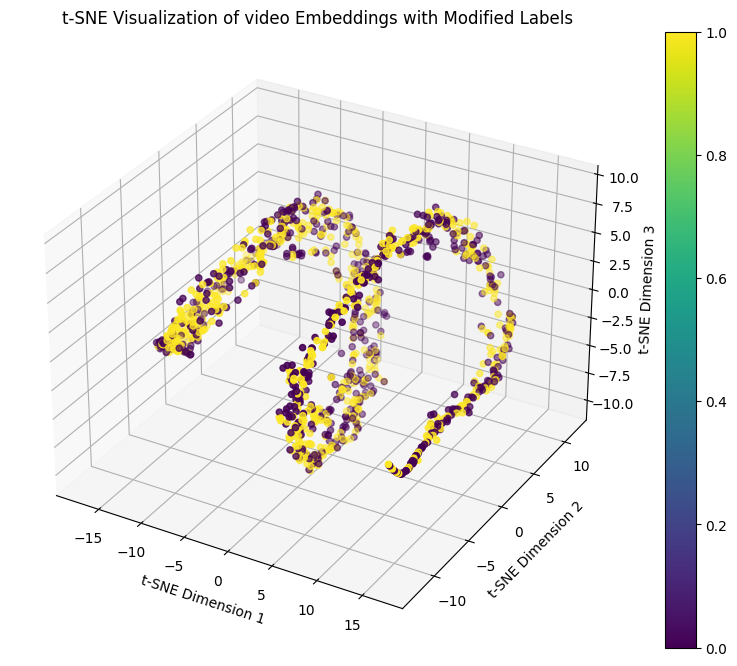

In [ ]:
# from sklearn.manifold import TSNE
# import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D  # Importing this for 3D plotting
# from sklearn.preprocessing import StandardScaler
# import numpy as np

# # Apply t-SNE
# tsne = TSNE(n_components=3, random_state=42)
# video_embeddings_tsne = tsne.fit_transform(all_video)

# # Visualize t-SNE in 3D
# fig = plt.figure(figsize=(10, 8))
# ax = fig.add_subplot(111, projection='3d')
# scatter = ax.scatter(video_embeddings_tsne[:, 0], video_embeddings_tsne[:, 1], video_embeddings_tsne[:, 2], c=all_labels, cmap='viridis')
# plt.title('t-SNE Visualization of video Embeddings with Modified Labels')
# ax.set_xlabel('t-SNE Dimension 1')
# ax.set_ylabel('t-SNE Dimension 2')
# ax.set_zlabel('t-SNE Dimension 3')
# plt.colorbar(scatter)
# plt.show()


In [ ]:
# all_text=[]
# all_labels = []

# for batch in traindata:
#     audio,video,text,labels=batch  #text and labels are the last two components
#     all_text.append(text)
#     labels = torch.where(labels > 0, torch.tensor(1), torch.tensor(0))
#     all_labels.append(labels)

# # Concatenate all batches
# all_text = torch.cat(all_text, dim=0)
# all_labels = torch.cat(all_labels, dim=0)

# # # Create a new DataLoader with all text and labels
# # new_dataset = TensorDataset(all_text, all_labels)
# # train_text_dataloader = DataLoader(new_dataset, batch_size=32,shuffle=True)

In [ ]:
# print(all_text.shape)
# print(all_labels.shape)

torch.Size([1283, 50, 300])
torch.Size([1283, 1])


In [ ]:
# all_text=all_text.squeeze()
# print(all_text.shape)

torch.Size([1283, 50, 300])


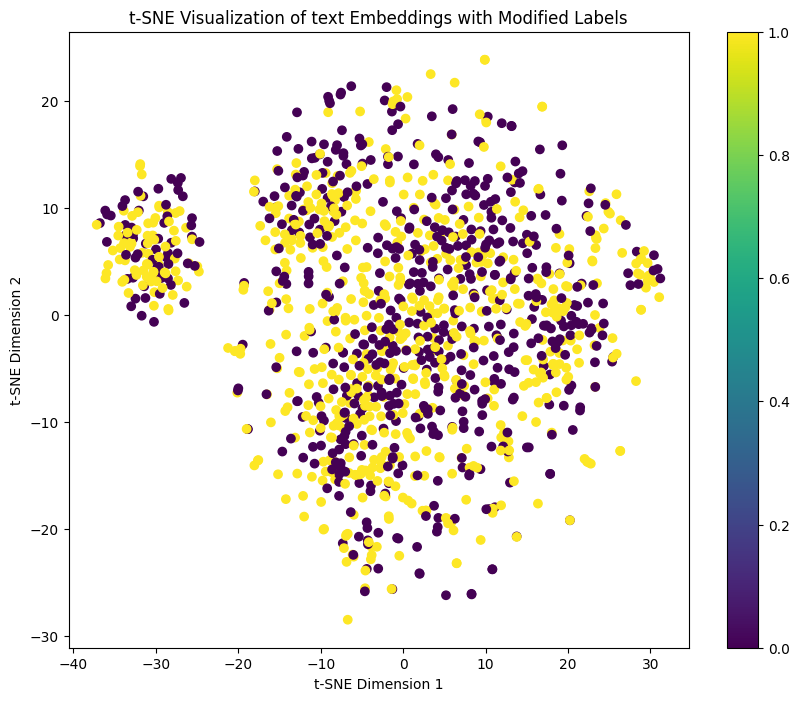

In [ ]:
# from sklearn.manifold import TSNE
# import matplotlib.pyplot as plt
# from sklearn.preprocessing import StandardScaler
# import numpy as np

# #Apply t-SNE

# # # Normalize text embeddings
# # scaler = StandardScaler()
# # normalized_text_embeddings = scaler.fit_transform(all_text)

# # Apply t-SNE

# all_text_reshaped = np.reshape(all_text, (all_text.shape[0] ,all_text.shape[1]*all_text.shape[2]))
# tsne = TSNE(n_components=2, random_state=42)
# text_embeddings_tsne = tsne.fit_transform(all_text_reshaped)

# # Visualize t-SNE
# plt.figure(figsize=(10, 8))
# plt.scatter(text_embeddings_tsne[:, 0], text_embeddings_tsne[:, 1], c=all_labels, cmap='viridis')
# plt.title('t-SNE Visualization of text Embeddings with Modified Labels')
# plt.xlabel('t-SNE Dimension 1')
# plt.ylabel('t-SNE Dimension 2')
# plt.colorbar()
# plt.show()


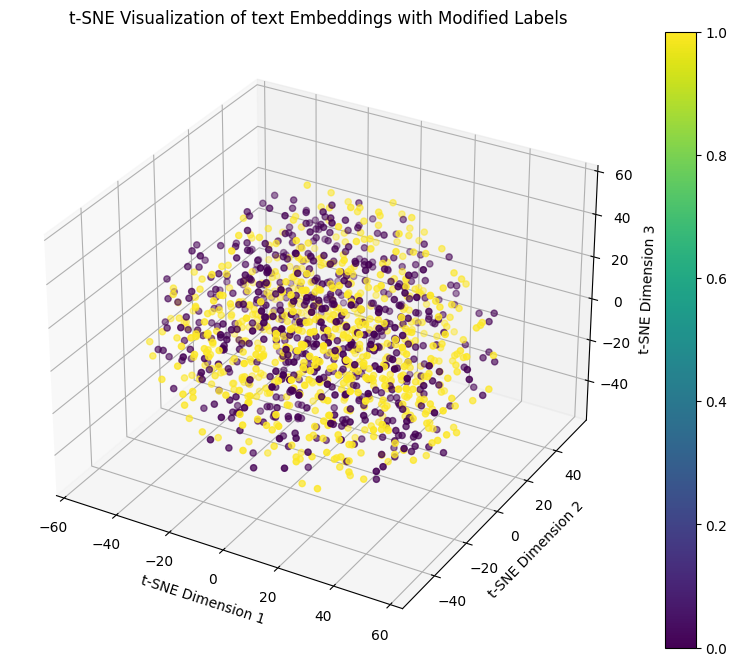

In [ ]:
# from sklearn.manifold import TSNE
# import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D  # Importing this for 3D plotting
# from sklearn.preprocessing import StandardScaler
# import numpy as np

# # Apply t-SNE
# tsne = TSNE(n_components=3, random_state=42)
# text_embeddings_tsne = tsne.fit_transform(all_text_reshaped)

# # Visualize t-SNE in 3D
# fig = plt.figure(figsize=(10, 8))
# ax = fig.add_subplot(111, projection='3d')
# scatter = ax.scatter(text_embeddings_tsne[:, 0], text_embeddings_tsne[:, 1], text_embeddings_tsne[:, 2], c=all_labels, cmap='viridis')
# plt.title('t-SNE Visualization of text Embeddings with Modified Labels')
# ax.set_xlabel('t-SNE Dimension 1')
# ax.set_ylabel('t-SNE Dimension 2')
# ax.set_zlabel('t-SNE Dimension 3')
# plt.colorbar(scatter)
# plt.show()


---------------------------------------------------------------------------------------------------------------------------

In [ ]:
# all_audio=[]
# all_video=[]
# all_text=[]
# all_labels = []

# for batch in traindata:
#     audio,video,text,labels=batch  #text and labels are the last two components
#     all_audio.append(audio)
#     all_video.append(video)
#     all_text.append(text)
#     labels = torch.where(labels > 0, torch.tensor(float(1)), torch.tensor(float(0)))
#     all_labels.append(labels)

# # Concatenate all batches
# all_audio = torch.cat(all_audio, dim=0)
# all_video = torch.cat(all_video, dim=0)
# all_text = torch.cat(all_text, dim=0)
# all_labels = torch.cat(all_labels, dim=0)

# # Create a new DataLoader with all text and labels
# new_dataset = TensorDataset(all_audio,all_video,all_text, all_labels)
# train_dataloader = DataLoader(new_dataset, batch_size=32,shuffle=True)

In [ ]:
# all_audio=[]
# all_video=[]
# all_text=[]
# all_labels = []

# for batch in validdata:
#     audio,video,text,labels=batch  #text and labels are the last two components
#     all_audio.append(audio)
#     all_video.append(video)
#     all_text.append(text)
#     labels = torch.where(labels > 0, torch.tensor(float(1)), torch.tensor(float(0)))
#     all_labels.append(labels)

# # Concatenate all batches
# all_audio = torch.cat(all_audio, dim=0)
# all_video = torch.cat(all_video, dim=0)
# all_text = torch.cat(all_text, dim=0)
# all_labels = torch.cat(all_labels, dim=0)

# # Create a new DataLoader with all text and labels
# new_dataset = TensorDataset(all_audio,all_video,all_text, all_labels)
# val_dataloader = DataLoader(new_dataset, batch_size=32,shuffle=True)

In [ ]:
# all_audio=[]
# all_video=[]
# all_text=[]
# all_labels = []

# for batch in testdata:
#     audio,video,text,labels=batch  #text and labels are the last two components
#     all_audio.append(audio)
#     all_video.append(video)
#     all_text.append(text)
#     labels = torch.where(labels > 0, torch.tensor(float(1)), torch.tensor(float(0)))
#     all_labels.append(labels)

# # Concatenate all batches
# all_audio = torch.cat(all_audio, dim=0)
# all_video = torch.cat(all_video, dim=0)
# all_text = torch.cat(all_text, dim=0)
# all_labels = torch.cat(all_labels, dim=0)

# # Create a new DataLoader with all text and labels
# new_dataset = TensorDataset(all_audio,all_video,all_text, all_labels)
# test_dataloader = DataLoader(new_dataset, batch_size=32,shuffle=True)

--------------------------------------------------------------------------------------------------------------------------------------

In [ ]:
import torch
import torch.nn as nn
from torch.nn.parameter import Parameter
import torch.nn.functional as F

class SubnetModel(nn.Module):
    def __init__(self,input_size,num_utterances,fc1_size, fc2_size,fc3_size):
        super(SubnetModel, self).__init__()

        self.drop = nn.Dropout(p=0.15)

        # Fully connected layers

        #fc1 gets hidden_size dimension values as input
        self.fc1 = nn.Linear(input_size, fc1_size)
        self.fc2 = nn.Linear(fc1_size, fc2_size)
        self.fc3 = nn.Linear(fc2_size, fc3_size)



        # Activation functions
        self.relu = nn.ReLU()


        # Set requires_grad=True for the weights of the layers
        for param in self.parameters():
            param.requires_grad = True


    def forward(self, x):

        x = torch.mean(x, dim=1)

        fc1_out = self.relu(self.fc1(x))
        # drop1=self.drop(fc1_out)

        fc2_out = self.relu(self.fc2(fc1_out))
        # drop2=self.drop(fc2_out)

        fc3_out=self.relu(self.fc3(fc2_out))
        # drop3=self.drop(fc3_out)

        return fc3_out



In [ ]:
import torch
import torch.nn as nn
from torch.nn.parameter import Parameter

class TextModel(nn.Module):
    def __init__(self,input_size, hidden_size, num_layers,fc1_size, fc2_size):
        super(TextModel, self).__init__()

        # LSTM layer (stacked LSTM)
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers,batch_first=True)

        # Fully connected layers
        self.drop = nn.Dropout(p=0.15)

        #fc1 gets hidden_size dimension values as input
        self.fc1 = nn.Linear(hidden_size, fc1_size)
        self.fc2 = nn.Linear(fc1_size, fc2_size)

        # Activation functions
        self.relu = nn.ReLU()
        # self.sigmoid=nn.Sigmoid()

        # Set requires_grad=True for the weights of the layers
        for param in self.parameters():
            param.requires_grad = True

    def forward(self, x):

        # LSTM layer

        lstm_out, (hidden_states, cell_states) = self.lstm(x)

        fc1_out = self.relu(self.fc1(hidden_states.squeeze()))
        # drop1=self.drop(fc1_out)

        fc2_out = self.relu(self.fc2(fc1_out))
        # drop2=self.drop(fc2_out)


        return fc2_out



In [ ]:
import torch
import torch.nn as nn
from torch.nn.parameter import Parameter
from torch.autograd import Variable

class TFN(nn.Module):
    def __init__(self,audio_params,video_params,text_params,SIN_params):
        super(TFN, self).__init__()

        self.audio_params=audio_params
        self.video_params=video_params
        self.text_params=text_params

        #unimodels
        self.audio_subnet=SubnetModel(audio_params[0],audio_params[1],audio_params[2],audio_params[3],audio_params[4])
        self.video_subnet=SubnetModel(video_params[0],video_params[1],video_params[2],video_params[3],video_params[4])
        self.text_subnet=TextModel(text_params[0],text_params[1],text_params[2],text_params[3],text_params[4])

        # Fully connected layers

        self.drop = nn.Dropout(p=0.15)

        #fc1 gets hidden_size dimension values as input
        self.fc1 = nn.Linear(((audio_params[2]+1)*(video_params[2]+1)*(text_params[3]+1)), SIN_params[0])
        self.fc2 = nn.Linear(SIN_params[0], SIN_params[1])

        # Output layer
        self.output_layer = nn.Linear(SIN_params[1], 1)

        # Activation functions
        self.relu = nn.ReLU()
        self.sigmoid=nn.Sigmoid()

        # Set requires_grad=True for the weights of the layers
        for param in self.parameters():
            param.requires_grad = True

    def forward(self,x):

        DTYPE = torch.FloatTensor

        batch_size=x[0].shape[0]

        # unimodal outputs

        audio_out=self.audio_subnet(x[0])
        video_out=self.video_subnet(x[1])
        text_out=self.text_subnet(x[2])

        # adding 1 to increase the dimension value

        audio_out = torch.cat((Variable(torch.ones(batch_size, 1).type(DTYPE), requires_grad=False), audio_out), dim=1)
        # print("audio_out")
        # print(audio_out.shape)
        video_out = torch.cat((Variable(torch.ones(batch_size, 1).type(DTYPE), requires_grad=False), video_out), dim=1)
        # print("video_out")
        # print(video_out.shape)
        text_out = torch.cat((Variable(torch.ones(batch_size, 1).type(DTYPE), requires_grad=False), text_out), dim=1)
        # print("text_out")
        # print(text_out.shape)


        # tensorfusion operation

        fusion_tensor = torch.bmm(audio_out.unsqueeze(2), video_out.unsqueeze(1))
        # print("fusion tensor 1")
        # print(fusion_tensor.shape)
        fusion_tensor = fusion_tensor.view(-1, (self.audio_params[2] + 1) * (self.video_params[2] + 1), 1)
        # print("fusion tensor 2")
        # print(fusion_tensor.shape)
        fusion_tensor = torch.bmm(fusion_tensor, text_out.unsqueeze(1)).view(batch_size, -1)
        # print("fusion tensor 3")
        # print(fusion_tensor.shape)


        # sentiment inference network (SIN)

        fc1_out = self.relu(self.fc1(fusion_tensor))
        # drop1=self.drop(fc1_out)

        fc2_out = self.relu(self.fc2(fc1_out))
        # drop2=self.drop(fc2_out)

        # Output layer with Sigmoid activation
        output = self.sigmoid(self.output_layer(fc2_out))



        return output

**-------------------------------------------------------------------------------------------------------------------------------------**

In [ ]:
max_seq_len=50

audio_params=(35,max_seq_len,32,32,32) # (feature_length,max_seq_len,fc1_size,fc2_size,fc3_size)
video_params=(74,max_seq_len,32,32,32) # (feature_length,max_seq_len,fc1_size,fc2_size,fc3_size)
text_params=(300,128,1,128,128) # (feature_length,LSTM_hidden_size,num_LSTM_layers,fc1_size,fc2_size)

SIN_params=(128,128)

final_model=TFN(audio_params,video_params,text_params,SIN_params)


loading weights of saved model

In [ ]:
# final_model.load_state_dict(torch.load('/content/drive/MyDrive/multi_model_SA/TFN_binary3-66%-74.pth'))

<All keys matched successfully>

In [ ]:
Loss = torch.nn.BCELoss()
optimizer = torch.optim.Adam(final_model.parameters(),lr=5e-4)
num_epochs = 20

num epochs=20 but run 3-4 times , lr=5e-5 , no weight_decay and no dropout , gave:

accuracy: 0.7243 , f1 score:0.7870 (changed train only)

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score ,f1_score

In [ ]:
for epoch in range(num_epochs):

    print("EPOCH : ",epoch+1)
    # Training
    total_train_loss=0.0
    num_sequences=0
    correct=0
    all_predictions = []
    all_targets = []
    final_model.train()  # Set the model to training mode
    for batch in train_dataloader:

        optimizer.zero_grad()  # Zero the gradients
        outputs = final_model(batch[:-1])
        labels=batch[-1]
        labels = torch.where(labels >= 0, torch.tensor(float(1)), torch.tensor(float(0)))

        loss = Loss(outputs, labels) # calculate loss based on probability values i.e dont change outputs to 1 and 0 yet
        total_train_loss+=loss
        loss.backward()  # Backpropagation
        optimizer.step()  # Update weights

        outputs = torch.where(outputs >= 0.5, torch.tensor(float(1)), torch.tensor(float(0))) # changing to 0s and 1s only

        all_predictions.extend(outputs)
        all_targets.extend(labels)

        num_sequences+=1


    average_train_loss = total_train_loss / num_sequences
    train_acc= accuracy_score(all_targets, all_predictions)
    f1 = f1_score(all_targets, all_predictions)
    print("-------------Training----------------")
    print(f'Epoch [{epoch + 1}/{num_epochs}],accuracy:{train_acc:.4f} ,f1 score:{f1:.4f}')


    # Validation
    final_model.eval()  # Set the model to evaluation mode
    total_val_loss = 0.0
    num_sequences=0
    val_all_predictions = []
    val_all_targets = []
    with torch.no_grad():

        for batch in test_dataloader:
            val_targets=batch[-1]
            val_outputs = final_model(batch[:-1])
            val_targets = torch.where(val_targets >= 0, torch.tensor(float(1)), torch.tensor(float(0)))

            val_loss = Loss(val_outputs, val_targets)

            total_val_loss += val_loss.item()

            val_outputs = torch.where(val_outputs >= 0.5, torch.tensor(float(1)), torch.tensor(float(0)))

            val_all_predictions.extend(val_outputs)
            val_all_targets.extend(val_targets)
            num_sequences+=1

    average_val_loss = total_val_loss / num_sequences
    val_all_predictions=np.array(val_all_predictions)
    val_all_targets=np.array(val_all_targets)
    acc = accuracy_score(val_all_targets, val_all_predictions)
    f1 = f1_score(val_all_targets, val_all_predictions)


    print("--------------Validation----------")
    print(f'Epoch [{epoch + 1}/{num_epochs}],accuracy: {acc:.4f} , f1 score:{f1:.4f}')

    print("\n \n")


---------------------------------------------------------------------------------------------

------------------------------------------------------------------------------------------

Test accuracy: 0.7040 , f1 Score: 0.7087


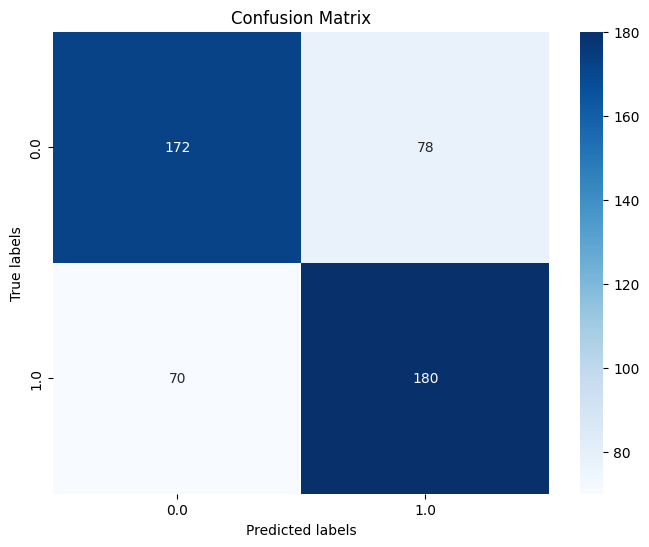

In [ ]:
# from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

final_model.eval()

with torch.no_grad():
    all_predictions = []
    all_targets = []

    for batch in test_dataloader:
        test_targets=batch[-1]
        test_targets = torch.where(test_targets >=0, torch.tensor(float(1)), torch.tensor(float(0)))
        test_outputs = final_model(batch[:-1])
        test_outputs = torch.where(test_outputs >= 0.5, torch.tensor(float(1)), torch.tensor(float(0)))

        # Convert predictions and targets to numpy arrays
        # predictions = test_outputs.numpy().flatten()
        # targets = test_targets.numpy().flatten()

        all_predictions.extend(test_outputs)
        all_targets.extend(test_targets)

    all_predictions=np.array(all_predictions)
    all_targets=np.array(all_targets)
    acc = accuracy_score(all_targets, all_predictions)
    f1 = f1_score(all_targets, all_predictions)

    print(f'Test accuracy: {acc:.4f} , f1 Score: {f1:.4f}')

    # Compute confusion matrix
    conf_matrix = confusion_matrix(all_targets, all_predictions)

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
                  xticklabels=np.unique(all_targets), yticklabels=np.unique(all_targets))
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix')
    plt.show()


----------------------------------------------------------------------------------------------------------------------------------

on testdata:

Test accuracy: 0.6603 , f1 Score: 0.6376 (change train and val)

Test accuracy: 0.6050 , f1 Score: 0.6067 (change only train)

on test_dataloader:

Test accuracy: 0.6700 , f1 Score: 0.6678

Test accuracy: 0.7040 , f1 Score: 0.7087


---------------------------------------------------------------------------------------------------------------------------------------

# Saving the model:


In [ ]:
torch.save(final_model.state_dict(), '/content/drive/MyDrive/multi_model_SA/TFN_binary_no_low_rank_final-test-70%-71.pth')

In [ ]:
torch.save(final_model.state_dict(), '/content/drive/MyDrive/multi_model_SA/TFN_present-74%-81.pth')

In [ ]:
torch.save(final_model.state_dict(), '/content/drive/MyDrive/multi_model_SA/TFN_binary_change_finalll-74%-80.pth')

In [ ]:
# torch.save(final_model.state_dict(), '/content/drive/MyDrive/multi_model_SA/TFN_binary_change_onlytrain-72%-78.pth')

In [ ]:
# torch.save(final_model.state_dict(), '/content/drive/MyDrive/multi_model_SA/TFN_binary_change_final-80%-81.pth')

------------------------------------------------------------